dict_keys(['memory', 'steps', 'verbose', 'interpolate', 'logistic', 'interpolate__features_name', 'interpolate__method', 'interpolate__num_samples', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/home/anderson/mc906/prj3/train.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   11.5s
[Parallel(n_jobs=6)]: Done  16 out of  24 | elapsed:   12.4s remaining:    6.2s
[Parallel(n_jobs=6)]: Done  19 out of  24 | elapsed:   14.8s remaining:    3.9s
[Parallel(n_jobs=6)]: Done  22 out of  24 | elapsed:   15.2s remaining:    1.4s
[Parallel(n_jobs=6)]: Done  24 out of  24 | elapsed:   15.8s finished


,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'logistic__C': 0.5, 'logistic__multi_class': 'ovr', 'logistic__penalty': 'l1'}",0.88,0.03,0.70,0.11
1,"{'logistic__C': 0.5, 'logistic__multi_class': 'ovr', 'logistic__penalty': 'l2'}",0.88,0.03,0.70,0.11
2,"{'logistic__C': 0.5, 'logistic__multi_class': 'multinomial', 'logistic__penalty': 'l1'}",0.90,0.01,0.71,0.11
3,"{'logistic__C': 0.5, 'logistic__multi_class': 'multinomial', 'logistic__penalty': 'l2'}",0.90,0.01,0.71,0.11
4,"{'logistic__C': 10, 'logistic__multi_class': 'ovr', 'logistic__penalty': 'l1'}",0.88,0.03,0.70,0.11
5,"{'logistic__C': 10, 'logistic__multi_class': 'ovr', 'logistic__penalty': 'l2'}",0.88,0.03,0.70,0.11
6,"{'logistic__C': 10, 'logistic__multi_class': 'multinomial', 'logistic__penalty': 'l1'}",0.90,0.01,0.71,0.11
7,"{'logistic__C': 10, 'logistic__multi_class': 'multinomial', 'logistic__penalty': 'l2'}",0.90,0.01,0.71,0.11


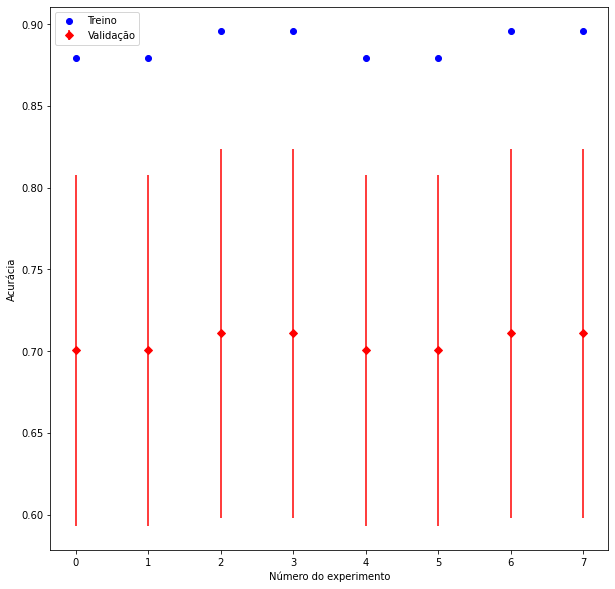

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
2,"{'logistic__C': 0.5, 'logistic__multi_class': 'multinomial', 'logistic__penalty': 'l1'}",0.90,0.01,0.71,0.11


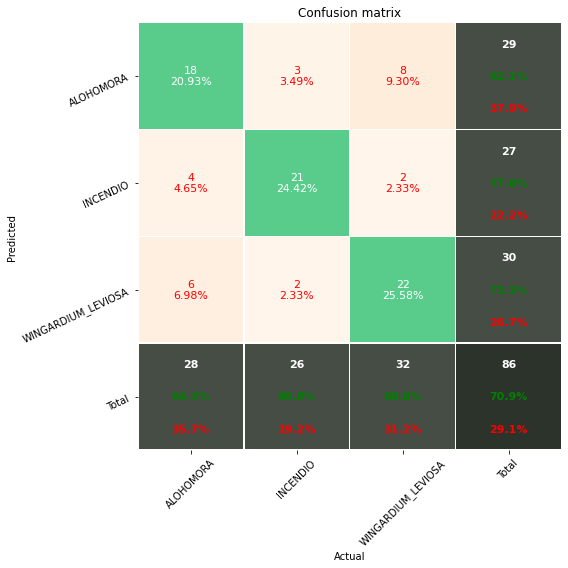

Pipeline(steps=[('interpolate', InterpolateRawData(num_samples=10)),
                ('logistic',
                 LogisticRegression(C=0.5, max_iter=100000,
                                    multi_class='multinomial', penalty='l1',
                                    random_state=0, solver='saga'))])

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from cross_validation import cv_folds_author
from data import load_database_train
from preprocessing import InterpolateRawData
from train import grid_search

database_train = load_database_train()

pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=10)),
    ('logistic', LogisticRegression(random_state=0, max_iter=100000, solver='saga'))
])

print(pipe.get_params().keys())

parameters = {'logistic__penalty': ('l1', 'l2'), 
              'logistic__C': [0.5, 10], 
              'logistic__multi_class': ['ovr', 'multinomial']}
grid_search(pipe, parameters,
            database_train.X,
            database_train.y,
            n_jobs=6)

In [1]:
import pandas as pd
from data import load_database
from plotter import plot_all_readings
import matplotlib.pyplot as plt
from preprocessing import interpolate_reading
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})

database = pd.DataFrame(data=load_database().to_dict())
database

,readings,spell,author,device,date
0,"{'ACC': [[0.046842992305755615, 2.6384103, 3.3...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:13.728936
1,"{'ACC': [[0.007115989923477173, -0.16759412, 2...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:06.670531
2,"{'ACC': [[0.13349801301956177, 7.0844426, 1.76...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:09.815516
3,"{'ACC': [[0.0065760016441345215, -0.8882488, 4...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:28.542751
4,"{'ACC': [[0.08161100745201111, -1.3503298, 0.9...",WINGARDIUM_LEVIOSA,DIEGO,SAMSUNG_A5,2020-07-23 19:22:17.161701
...,...,...,...,...,...
81,"{'ACC': [[0.007611006498336792, -7.433996, 2.0...",INCENDIO,GUILHERME,SAMSUNG_A5,2020-07-23 19:20:28.825398
82,"{'ACC': [[0.007923007011413574, 10.730812, 0.9...",INCENDIO,GUILHERME,SAMSUNG_A5,2020-07-23 19:20:07.693713
83,"{'ACC': [[0.08246001601219177, -8.616732, 2.14...",INCENDIO,GUILHERME,SAMSUNG_A5,2020-07-23 19:20:17.554542
84,"{'ACC': [[0.007611006498336792, -4.807557, 3.5...",INCENDIO,GUILHERME,SAMSUNG_A5,2020-07-23 19:20:21.513534


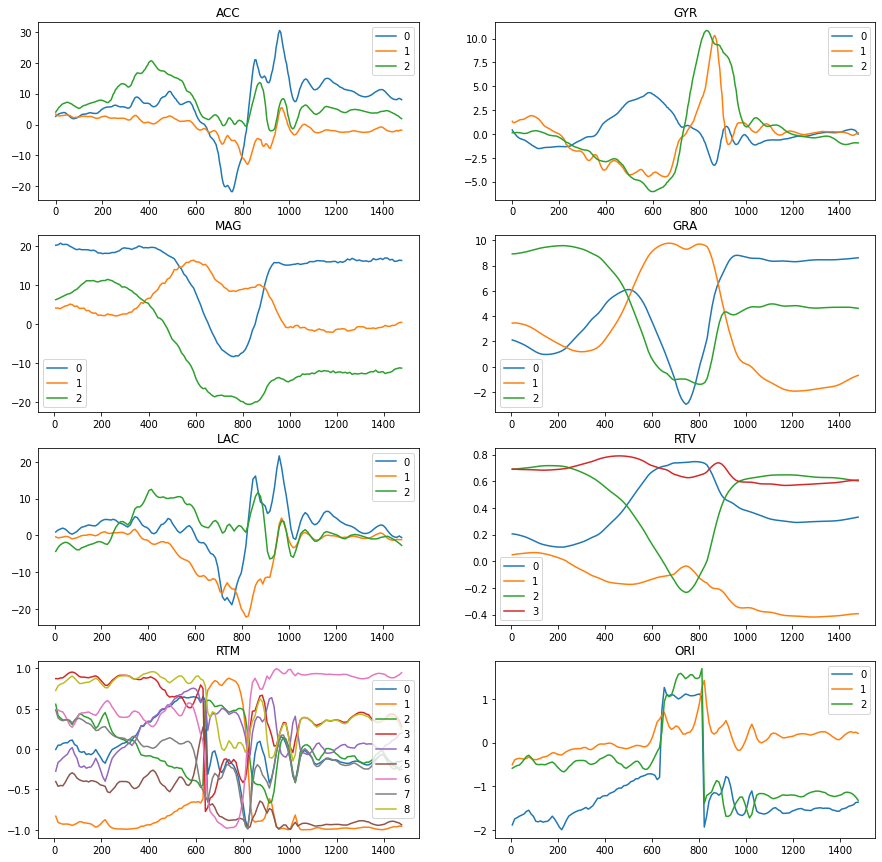

In [2]:
readings = database['readings'][0]
plot_all_readings(readings,  table_format=(4, 2))

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from cross_validation import cv_folds_author
from data import load_database_train
from preprocessing import InterpolateRawData
from utils import grid_search

database_train = load_database_train()

pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=10)),
    ('logistic', LogisticRegression(random_state=0, max_iter=100000, solver='saga'))
])

print(pipe.get_params().keys())

#pipe.fit(database_train.get_datalist(), database_train.get_y())

#scores = cross_val_score(pipe, database_train.get_datalist(), database_train.get_y(), cv=cv_folds_author(database_train))
#print(scores)

parameters = {'logistic__penalty': ('l1', 'l2'), 'logistic__C': [0.5, 10]}
grid_search(pipe, parameters,
            database_train.get_datalist(),
            database_train.get_y(),
            cv_folds_author(database_train),
            n_jobs=6)



dict_keys(['memory', 'steps', 'verbose', 'interpolate', 'logistic', 'interpolate__features_name', 'interpolate__method', 'interpolate__num_samples', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])


AttributeError: 'Database' object has no attribute 'get_datalist'

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

X = []
y = []

for i, reading in enumerate(database['readings']):
    X.append(reading['ACC'][1:].reshape(-1))
    y.append(database['spell'][i])
    
X = np.array(X)
y = np.array(y)

clf = LogisticRegression(random_state=0).fit(X, y)

clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

ValueError: setting an array element with a sequence.

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

for i, reading in enumerate(database['readings']):
    interpolated = interpolate_readings(reading)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(database['spell'][i].value)
    

NameError: name 'interpolate_readings' is not defined

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

for i, reading in enumerate(database['readings']):
    interpolated = interpolate_reading(reading)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(database['spell'][i].value)
    
X = np.array(X)
y = np.array(y)
print(y)

clf = LogisticRegression(random_state=0, max_iter=100000)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

AttributeError: 'dict' object has no attribute 'get_min_timestamp'

In [36]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

for i, reading in enumerate(database['readings']):
    interpolated = interpolate_readings(reading)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(database['spell'][i].value)
    
X = np.array(X)
y = np.array(y)
print(y)

clf =  KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

['WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA'
 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA'
 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA'
 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA' 'WINGARDIUM_LEVIOSA'
 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA'
 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'ALOHOMORA' 'INCENDIO' 'INCENDIO'
 'INCENDIO' 'INCENDIO' 'INCENDIO' 'INCENDIO' 'INCENDIO' 'INCENDIO'
 'INCENDIO' 'INCENDIO']
[0.25       0.75       0.66666667 0.33333333 0.66666667 0.66666667
 0.66666667 1.         0.66666667 1.        ]


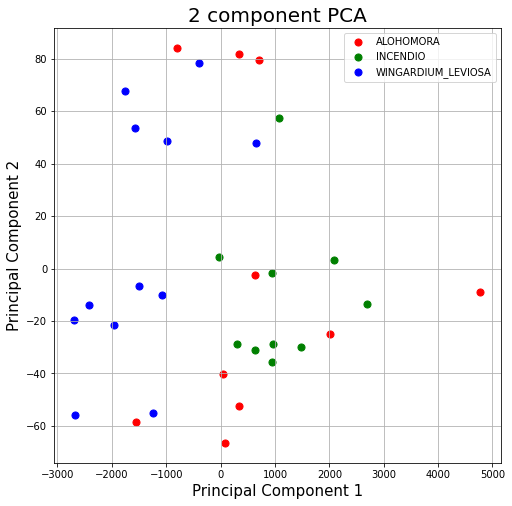

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = []
y = []

for i, reading in enumerate(database['readings']):
    interpolated = interpolate_readings(reading)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(database['spell'][i].value)
    
X = np.array(X)
y = np.array(y)

#X = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['spell'])], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['spell'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()